In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Generate dataset

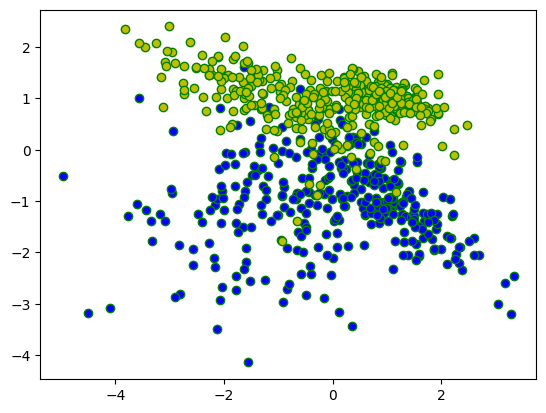

In [26]:
features_X, class_y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0)
data = np.insert(features_X, obj=2, values=class_y , axis=1)
train, test = train_test_split(data, shuffle=True)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Ridge Classifier

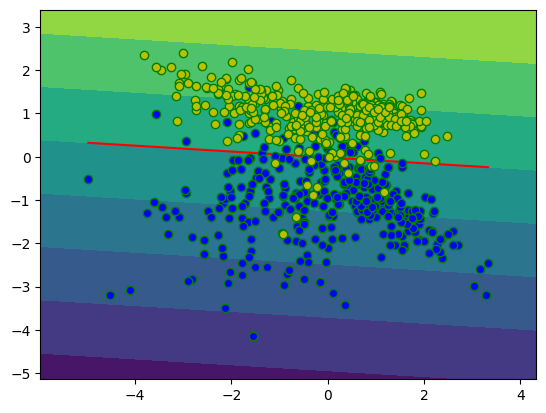

In [27]:
ridge = RidgeClassifier(alpha=10)
ridge.fit(train[:, [0,1]], train[:, 2])
a, b, c = ridge.coef_[0][0], ridge.coef_[0][1], ridge.intercept_[0]
x_min = min(data[:, 0])
y_min = -1*(a*x_min + c)/b
x_max = max(data[:, 0])
y_max = -1*(a*x_max + c)/b
line = np.linspace(start=[x_min, y_min], stop=[x_max, y_max])

DecisionBoundaryDisplay.from_estimator(ridge, features_X)
plt.plot(line[:, 0], line[:, 1], color='r', scalex=False, scaley=False)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Naive Bayes Gaussian

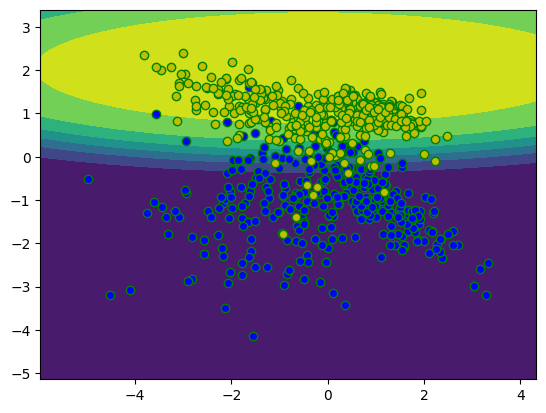

In [38]:
bayes = GaussianNB(var_smoothing=0.05)
bayes.fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(bayes, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Quadratic classifier

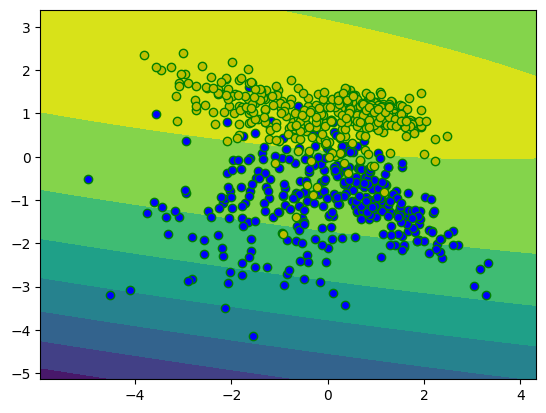

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

quad = QuadraticDiscriminantAnalysis(reg_param=0.01).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(quad, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Polynomial Ridge Classifier

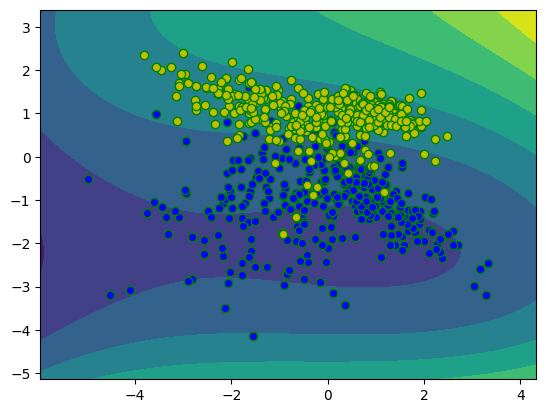

In [93]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(alpha=0.1, kernel='polynomial', degree=3).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(kr, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Support vectors

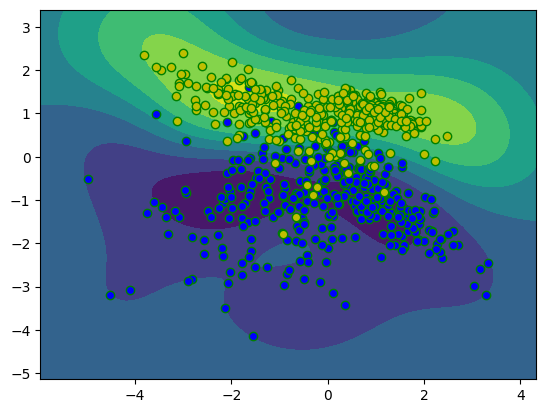

In [106]:
from sklearn.svm import SVC

svr = SVC(C=3).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(svr, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Nearest-neighbors classifier

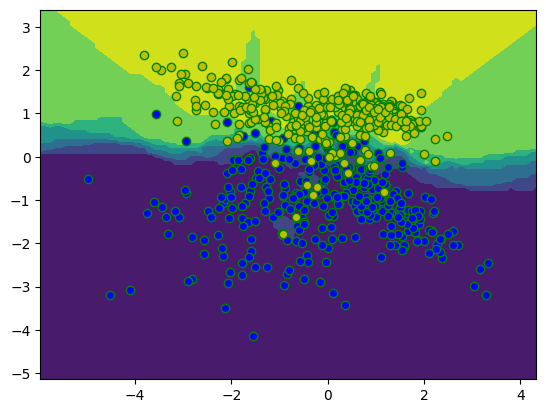

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(knn, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')

# Decision tree ensemble

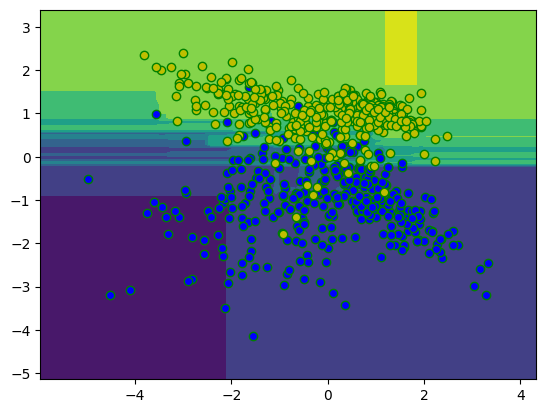

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier(n_estimators=100, max_depth=5).fit(train[:, [0,1]], train[:, 2])
DecisionBoundaryDisplay.from_estimator(tree, features_X)
plt.plot(train[train[:, 2] == 0][:, 0], train[train[:, 2] == 0][:, 1], 'ob', markeredgecolor='g')
plt.plot(train[train[:, 2] == 1][:, 0], train[train[:, 2] == 1][:, 1], 'oy', markeredgecolor='g')